<a href="https://colab.research.google.com/github/Neeraj004/Projects/blob/main/Loan_Prediction_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAN PREDICTION**

In [851]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [852]:
#Reading Train dataset
tdf1=pd.read_csv('/content/train_ctrUa4K.csv')

In [853]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [854]:
tdf1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [855]:
tdf=tdf1.copy()

In [856]:
clm=tdf.columns

#Understanding the Data


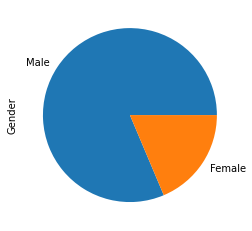

In [857]:
tdf['Gender'].value_counts(normalize=True).plot(kind='pie')

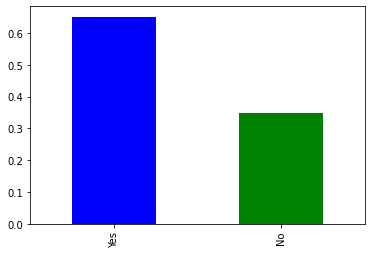

In [858]:
tdf['Married'].value_counts(normalize=True).plot(kind='bar',color=['b','g'])

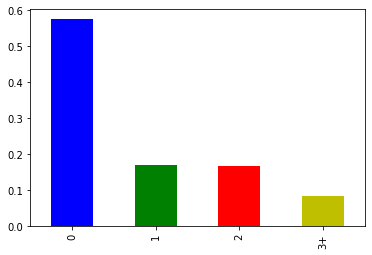

In [859]:
tdf['Dependents'].value_counts(normalize=True).plot(kind='bar',color=['b','g','r','y'])

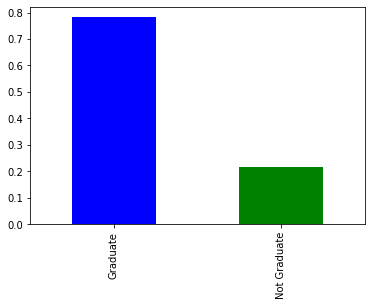

In [860]:
tdf['Education'].value_counts(normalize=True).plot(kind='bar',color=['b','g'])

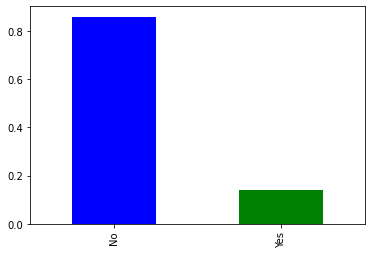

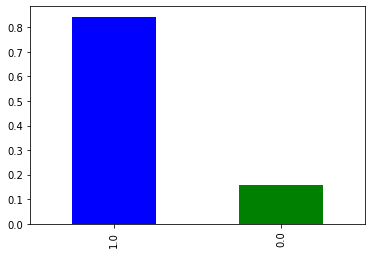

In [861]:
tdf['Self_Employed'].value_counts(normalize=True).plot(kind='bar',color=['b','g'])
plt.show()
tdf['Credit_History'].value_counts(normalize=True).plot(kind='bar',color=['b','g'])
plt.show()

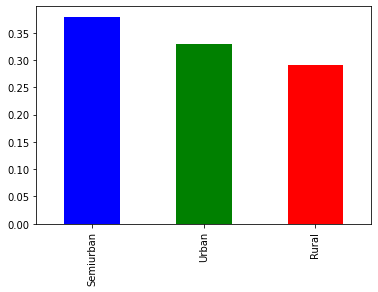

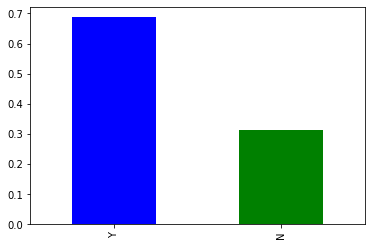

In [862]:
tdf['Property_Area'].value_counts(normalize=True).plot(kind='bar',color=['b','g','r'])
plt.show()
tdf['Loan_Status'].value_counts(normalize=True).plot(kind='bar',color=['b','g'])
plt.show()

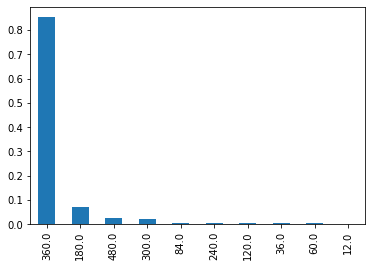

In [863]:
tdf['Loan_Amount_Term'].value_counts(normalize=True).plot(kind='bar')

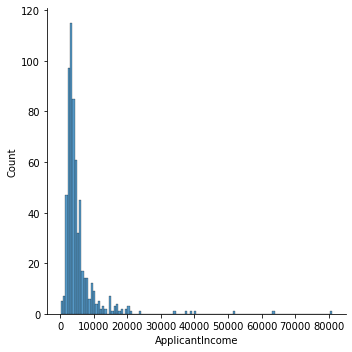

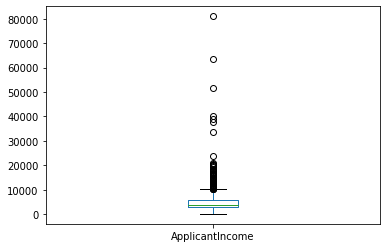

In [864]:
#finding the distribution
sns.displot(tdf['ApplicantIncome'])
plt.show()
tdf['ApplicantIncome'].plot.box()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

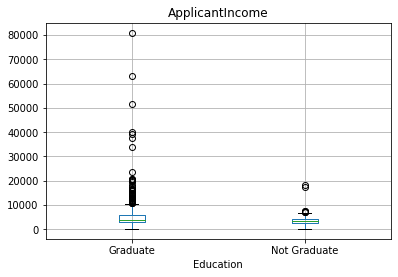

In [865]:
#explaining the high amount of outliers in applicant income 
tdf.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")
#Graduates tend to earn more than non graduates

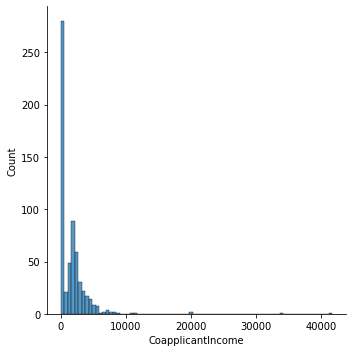

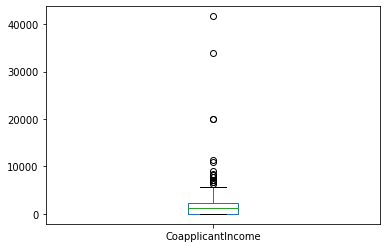

In [866]:
sns.displot(tdf['CoapplicantIncome'])
plt.show()
tdf['CoapplicantIncome'].plot.box()

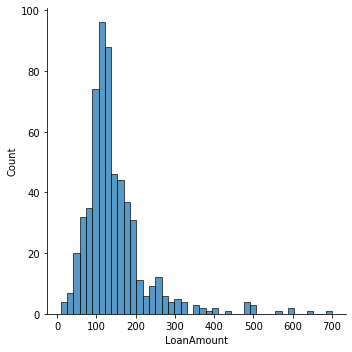

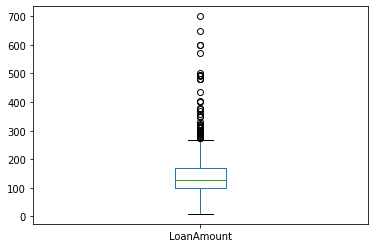

In [867]:
sns.displot(tdf['LoanAmount'])
plt.show()
tdf['LoanAmount'].plot.box()

comparing each feature with loan status

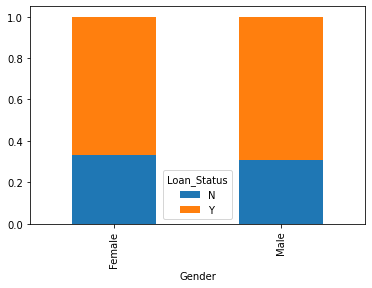

In [868]:
k=pd.crosstab(tdf['Gender'],tdf['Loan_Status'])
tdf2=k.div(k.sum(1).astype(float),axis=0)
tdf2.plot(kind='bar',stacked=True)

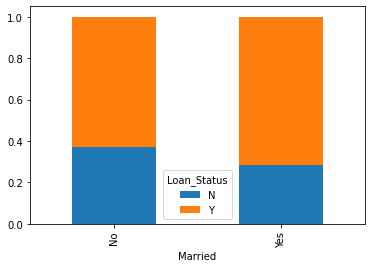

In [869]:
mar=pd.crosstab(tdf[clm[2]],tdf[clm[-1]])
mar.div(mar.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

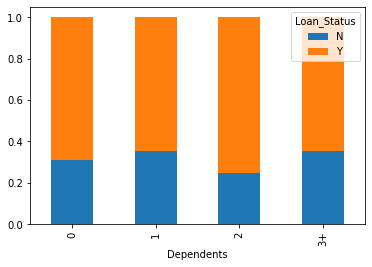

In [870]:
dept=pd.crosstab(tdf[clm[3]],tdf[clm[-1]])
dept.div(dept.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

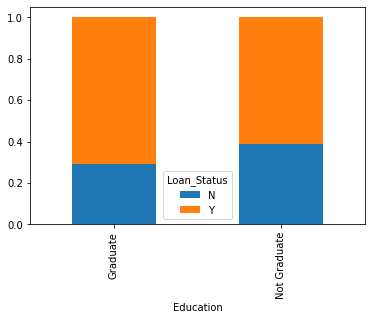

In [871]:
edu=pd.crosstab(tdf[clm[4]],tdf[clm[-1]])
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

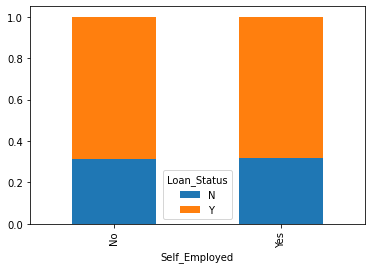

In [872]:
empl=pd.crosstab(tdf[clm[5]],tdf[clm[-1]])
empl.div(empl.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

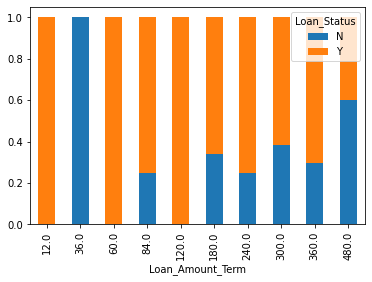

In [873]:
term=pd.crosstab(tdf[clm[-4]],tdf[clm[-1]])
term.div(term.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

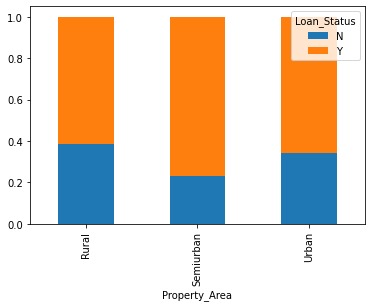

In [874]:
ppty=pd.crosstab(tdf[clm[-2]],tdf[clm[-1]])
ppty.div(ppty.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

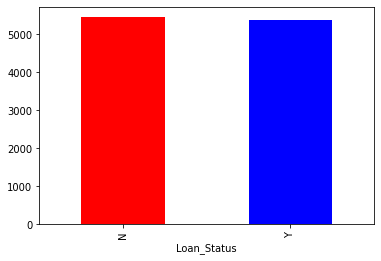

In [875]:
tdf.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color=['r','b'])

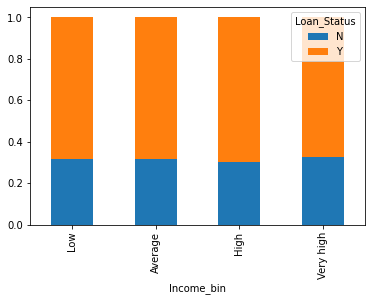

In [876]:
bins=[0,2500,5000,10000,81000]
group=['Low','Average','High','Very high']
tdf['Income_bin']=pd.cut(tdf[clm[6]],bins,labels=group)
incm=pd.crosstab(tdf['Income_bin'],tdf['Loan_Status'])
incm.div(incm.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

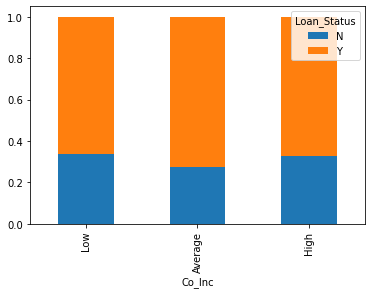

In [877]:
bins=[-1,1000,3000,42000]
group=['Low','Average','High']
tdf['Co_Inc']=pd.cut(tdf['CoapplicantIncome'],bins,labels=group)
coinc=pd.crosstab(tdf['Co_Inc'],tdf['Loan_Status'])
coinc.div(coinc.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

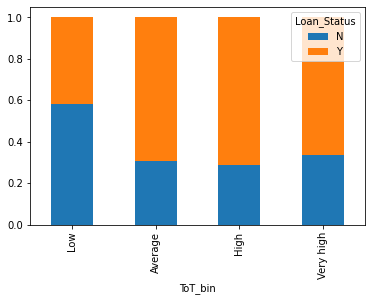

In [878]:
tdf['Total_Income']=tdf[clm[6]]+tdf[clm[7]]
bins=[0,2500,5000,10000,81000]
group=['Low','Average','High','Very high']
tdf['ToT_bin']=pd.cut(tdf['Total_Income'],bins,labels=group)
tot=pd.crosstab(tdf['ToT_bin'],tdf['Loan_Status'])
tot.div(tot.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

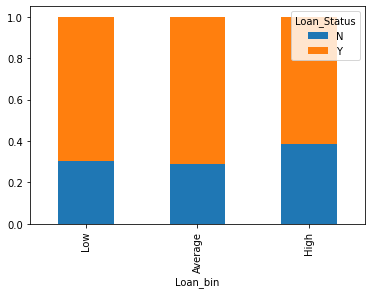

In [879]:
bins=[0,100,200,700]
group=['Low','Average','High']
tdf['Loan_bin']=pd.cut(tdf['LoanAmount'],bins,labels=group)
lon=pd.crosstab(tdf['Loan_bin'],tdf['Loan_Status'])
lon.div(lon.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

#Data Preparation

In [880]:
tdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Inc,Total_Income,ToT_bin,Loan_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,Low,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Average,Average,6091.0,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,Low,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,Low,6000.0,High,Average


In [881]:
#remove unwanted features
tdf=tdf.drop(['ApplicantIncome','CoapplicantIncome','Income_bin','Co_Inc','ToT_bin','Loan_bin','Loan_ID'],axis=1)

In [882]:
tdf['Gender'].fillna(tdf['Gender'].mode()[0], inplace=True)
tdf['Married'].fillna(tdf['Married'].mode()[0], inplace=True)
tdf['Dependents'].fillna(tdf['Dependents'].mode()[0], inplace=True)
tdf['Self_Employed'].fillna(tdf['Self_Employed'].mode()[0], inplace=True)
tdf['Credit_History'].fillna(tdf['Credit_History'].mode()[0], inplace=True)
tdf['Loan_Amount_Term'].fillna(tdf['Loan_Amount_Term'].mode()[0], inplace=True)
tdf['LoanAmount'].fillna(tdf['LoanAmount'].median(), inplace=True)
tdf.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
dtype: int64

feature engineering

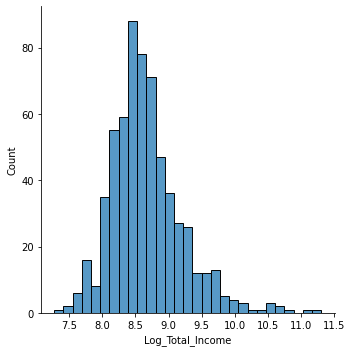

In [883]:
#taking log of total income to remove outliers
tdf['Log_Total_Income']=np.log(tdf['Total_Income'])
sns.displot(tdf['Log_Total_Income'])

In [884]:
tdf['EMI']=tdf['LoanAmount']/tdf['Loan_Amount_Term']
tdf.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_Total_Income,EMI
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0,8.674026,0.355556
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.714568,0.355556
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,0.183333
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,8.505323,0.333333
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,0.391667


In [885]:
tdf=tdf.drop(['Total_Income','Loan_Amount_Term'],axis=1)

correlation matrix

In [886]:
tdf['Loan_Status'].replace(to_replace="Y",value=1,inplace=True)
tdf['Loan_Status'].replace(to_replace="N",value=0,inplace=True)

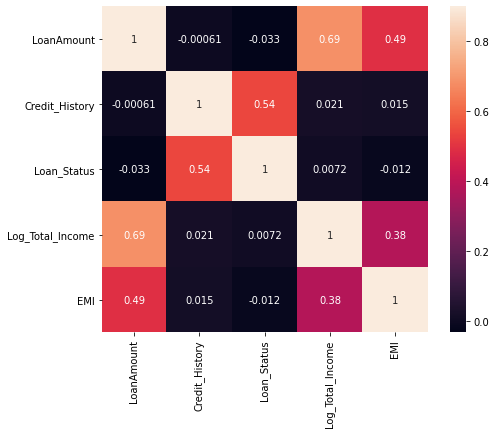

In [887]:
mat=tdf.corr()
f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(mat,vmax=.9,square=True,annot=True)

In [888]:
bdf=tdf.drop(['Loan_Status'],axis=1)
bdf.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Log_Total_Income,EMI
0,Male,No,0,Graduate,No,128.0,1.0,Urban,8.674026,0.355556
1,Male,Yes,1,Graduate,No,128.0,1.0,Rural,8.714568,0.355556
2,Male,Yes,0,Graduate,Yes,66.0,1.0,Urban,8.006368,0.183333
3,Male,Yes,0,Not Graduate,No,120.0,1.0,Urban,8.505323,0.333333
4,Male,No,0,Graduate,No,141.0,1.0,Urban,8.699515,0.391667


In [889]:
#Convert categorical variable into indicator variables.
gdf=pd.get_dummies(bdf)
gdf.head()

,LoanAmount,Credit_History,Log_Total_Income,EMI,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,128.0,1.0,8.674026,0.355556,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,128.0,1.0,8.714568,0.355556,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,66.0,1.0,8.006368,0.183333,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,120.0,1.0,8.505323,0.333333,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,141.0,1.0,8.699515,0.391667,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [890]:
ydf=tdf['Loan_Status']

#Model Creation

##LogisticRegression

In [891]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [892]:
#spliting data to train and test the model
x_tx,x_cx,y_tx,y_cx=train_test_split(gdf,ydf,test_size=0.3)

In [893]:
from sklearn.linear_model import LogisticRegression

In [894]:
lr=LogisticRegression()

In [895]:
lr.fit(x_tx,y_tx)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [896]:
yprx=lr.predict(x_cx)

In [897]:
accuracy_score(yprx,y_cx)

0.827027027027027

##RandomForest

In [898]:
from sklearn.ensemble import RandomForestClassifier

In [899]:
rf=RandomForestClassifier()
rf.fit(x_tx,y_tx)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [900]:
ypre=rf.predict(x_cx)
accuracy_score(ypre,y_cx)

0.7945945945945946

#Predicting the Test Values


In [901]:
test=pd.read_csv('/content/test_lAUu6dG.csv')
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [902]:
test['Gender'].fillna(tdf1['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(tdf1['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(tdf1['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(tdf1['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(tdf1['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(tdf1['LoanAmount'].median(), inplace=True)

In [903]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [904]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['Log_Total_Income']=np.log(test['Total_Income'])
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Log_Total_Income,EMI
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724,0.305556
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581,0.350000
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678,0.577778
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129,0.277778
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378,0.216667


In [905]:
test2=test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Total_Income'],axis=1)


In [906]:
test2=pd.get_dummies(test2)
test2.head()

,LoanAmount,Credit_History,Log_Total_Income,EMI,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,110.0,1.0,8.651724,0.305556,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,126.0,1.0,8.428581,0.350000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,208.0,1.0,8.824678,0.577778,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,100.0,1.0,8.494129,0.277778,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,78.0,1.0,8.094378,0.216667,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


Using RandomForest

In [907]:
pre=rf.predict(test2)

In [908]:
success=pd.DataFrame({'Loan_ID':test['Loan_ID'],
                      'Loan_status':pre})

In [909]:
success['Loan_status'].replace(1,'Y',inplace=True)
success['Loan_status'].replace(0,'N',inplace=True)

In [910]:
success

,Loan_ID,Loan_status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [911]:
success['Loan_status'].value_counts()

Y    283
N     84
Name: Loan_status, dtype: int64

Using LogisticRegression

In [912]:
pre=lr.predict(test2)

In [913]:
success=pd.DataFrame({'Loan_ID':test['Loan_ID'],
                      'Loan_status':pre})

In [914]:
success['Loan_status'].replace(1,'Y',inplace=True)
success['Loan_status'].replace(0,'N',inplace=True)

In [915]:
success

,Loan_ID,Loan_status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [916]:
success['Loan_status'].value_counts()

Y    307
N     60
Name: Loan_status, dtype: int64